In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

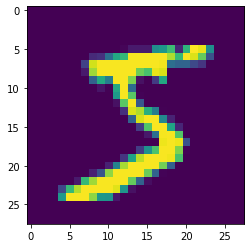

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
y_ex= to_categorical(y_train)

In [11]:
y_ex.shape

(60000, 10)

In [12]:
y_test_cat = to_categorical(y_test)
y_train_cat = to_categorical(y_train)

In [13]:
#normalizing
X_train = X_train/255
X_test = X_test/255

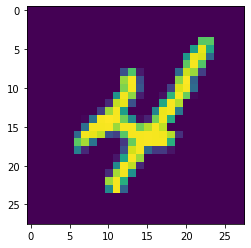

In [14]:
plt.imshow(X_train[9])

In [15]:
# adding a color channel size,width,height,color channel 1 for BW 3 for RGB
X_train = X_train.reshape(60000,28,28,1)

In [16]:
X_test = X_test.reshape(10000,28,28,1)

In [17]:
## Creating the model


In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters = 32,
                 kernel_size = (4,4),
                 strides = (1,1),
                 padding = 'valid',
                 input_shape = (28,28,1),
                 activation='relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

## Output 
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience = 1)

In [22]:
model.fit(X_train,y_train_cat,epochs = 10,
         validation_data = (X_test,y_test_cat),
         callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 401us/sample - loss: 0.1383 - accuracy: 0.9582 - val_loss: 0.0520 - val_accuracy: 0.9836
Epoch 2/10
60000/60000 [==============================] - 25s 415us/sample - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0438 - val_accuracy: 0.9861
Epoch 3/10
60000/60000 [==============================] - 25s 424us/sample - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 4/10
60000/60000 [==============================] - 25s 424us/sample - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0383 - val_accuracy: 0.9880


In [23]:
model_metric = pd.DataFrame(model.history.history)

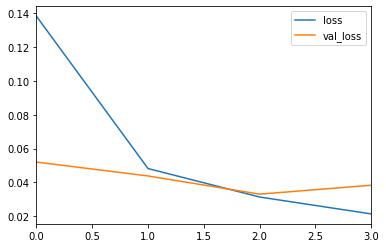

In [24]:
model_metric[['loss','val_loss']].plot()

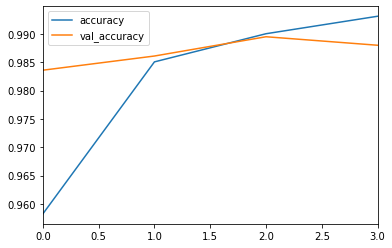

In [25]:
model_metric[['accuracy','val_accuracy']].plot()

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
predictions = model.predict_classes(X_test)

In [33]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [37]:
print(confusion_matrix(y_test,predictions))

[[ 976    0    0    1    1    0    1    0    1    0]
 [   2 1121    3    2    0    1    4    0    2    0]
 [   1    1 1025    0    0    0    0    4    1    0]
 [   0    0    3 1001    0    3    0    1    2    0]
 [   0    0    1    0  973    0    1    1    1    5]
 [   2    0    1    7    0  879    2    0    1    0]
 [   7    2    0    0    2    5  940    0    2    0]
 [   1    0    4    1    0    0    0 1017    2    3]
 [   5    0    3    2    2    1    0    1  959    1]
 [   1    1    0    1    4    3    0    7    3  989]]
